# Machine Learning - II 
## Project : Human Activity Recognition using Clasification
### By Dhaval H Parikh



# Table of Content

1. Introduction
2. Libraries/Packages
3. Load Data
4. Data Exploration and EDA
5. Define Common Functions used across workbook
6. Activity Exploration
7. Data Preparation and Feature Selection
8. Model Creation and Evaluation
9. Refining Model using GridSearchCV
10. Conclusion and Observations


### 1. Introduction

The given dataset has information from various sensors for 6 different activities. Based on this dataset we plan to build the model to pridict the human activity based on these sensor readings. 

As part of this project we will be exploring
1. Visualization of Class boundries with TSNE.
2. Feature selection/reduction (PCA and other algorithms)
3. Model Selection (Evaluate multiple algorithms for best fit algorithm for givan dataset)
4. Model Tuning (Using GridSearchCV tune the selected model for best predictions)


### 2. Load Libraries/Packages

In [1]:
#Import Basic Libraries

import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import rgb2hex

import itertools

import seaborn as sns
import scikitplot as skplt
from sklearn.metrics import *


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectFromModel

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.multiclass import OneVsRestClassifier

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

 ### 3. Load Data

In [2]:
orgDS = pd.read_csv('./Human_activity_recognition.csv')

### 4. Data Exploration and EDA

In [3]:
print(orgDS.shape)
orgDS.sample(10)

(3609, 563)


rn            activity  tBodyAcc.mean.X  tBodyAcc.mean.Y  \
329     942             WALKING            0.212         -0.02350   
3595  10254  WALKING_DOWNSTAIRS            0.319          0.00534   
2950   8452             SITTING            0.279         -0.02490   
744    2146             WALKING            0.252         -0.00605   
1504   4294              LAYING            0.268         -0.01790   
493    1380              LAYING            0.258         -0.01530   
16       54              LAYING            0.277         -0.01790   
2548   7288             WALKING            0.277          0.03180   
2901   8308              LAYING            0.283         -0.01250   
178     546            STANDING            0.272         -0.01780   

      tBodyAcc.mean.Z  tBodyAcc.std.X  tBodyAcc.std.Y  tBodyAcc.std.Z  \
329            -0.119         -0.2190         -0.0307         -0.4330   
3595           -0.142         -0.0945          0.0698         -0.0886   
2950           -0.106         -0.9620         -0.9010         -0.9540   
744            -0.116         -0.3750          0.0707         -0.5730   
1504           -0.102         -0.9320         -0.9730         -0.9490   
493            -0.108         -0.9740         -0.9780         -0.9750   
16             -0.108         -0.9940         -0.9960         -0.9960   
2548           -0.123         -0.2830         -0.1330         -0.0997   
2901           -0.110         -0.9000         -0.9540         -0.9590   
178            -0.123         -0.9680         -0.9110         -0.9470   

      tBodyAcc.mad.X  tBodyAcc.mad.Y  ...  fBodyBodyGyroJerkMag.meanFreq  \
329           -0.289        -0.00925  ...                        -0.1740   
3595          -0.126         0.03320  ...                         0.2730   
2950          -0.976        -0.90800  ...                        -0.2110   
744           -0.393         0.10200  ...                         0.0817   
1504          -0.929        -0.97000  ...                         0.2960   
493           -0.975        -0.97600  ...                         0.1850   
16            -0.995        -0.99600  ...                         0.4380   
2548          -0.367        -0.15100  ...                         0.1640   
2901          -0.921        -0.96100  ...                         0.5070   
178           -0.978        -0.92400  ...                        -0.2650   

      fBodyBodyGyroJerkMag.skewness  fBodyBodyGyroJerkMag.kurtosis  \
329                          0.4590                         0.2470   
3595                         0.2750                         0.0655   
2950                         0.1840                        -0.2280   
744                         -0.1490                        -0.5860   
1504                         0.4110                         0.2370   
493                         -0.3970                        -0.7370   
16                          -0.5190                        -0.8130   
2548                        -0.5940                        -0.8920   
2901                        -0.4150                        -0.6620   
178                          0.0379                        -0.2430   

      angle.tBodyAccMean.gravity  angle.tBodyAccJerkMean.gravityMean  \
329                       0.7540                            -0.15100   
3595                     -0.2910                             0.54700   
2950                     -0.1210                            -0.15200   
744                       0.5780                             0.28800   
1504                     -0.2170                             0.07420   
493                      -0.0598                            -0.21500   
16                        0.2930                            -0.01860   
2548                      0.0791                            -0.68100   
2901                     -0.5950                            -0.00603   
178                       0.0994                             0.18000   

      angle.tBodyGyroMean.gravityMean  angle

In [4]:
orgDS.isnull().values.any()

False

There are no null values in dataset

In [5]:
#droping the Row Number Column (rn) as this is not required for the analysis

orgDS.drop('rn', axis =1, inplace=True)

In [6]:
#Get List of columns
cols = orgDS.columns.tolist()

print(cols)

['activity', 'tBodyAcc.mean.X', 'tBodyAcc.mean.Y', 'tBodyAcc.mean.Z', 'tBodyAcc.std.X', 'tBodyAcc.std.Y', 'tBodyAcc.std.Z', 'tBodyAcc.mad.X', 'tBodyAcc.mad.Y', 'tBodyAcc.mad.Z', 'tBodyAcc.max.X', 'tBodyAcc.max.Y', 'tBodyAcc.max.Z', 'tBodyAcc.min.X', 'tBodyAcc.min.Y', 'tBodyAcc.min.Z', 'tBodyAcc.sma', 'tBodyAcc.energy.X', 'tBodyAcc.energy.Y', 'tBodyAcc.energy.Z', 'tBodyAcc.iqr.X', 'tBodyAcc.iqr.Y', 'tBodyAcc.iqr.Z', 'tBodyAcc.entropy.X', 'tBodyAcc.entropy.Y', 'tBodyAcc.entropy.Z', 'tBodyAcc.arCoeff.X.1', 'tBodyAcc.arCoeff.X.2', 'tBodyAcc.arCoeff.X.3', 'tBodyAcc.arCoeff.X.4', 'tBodyAcc.arCoeff.Y.1', 'tBodyAcc.arCoeff.Y.2', 'tBodyAcc.arCoeff.Y.3', 'tBodyAcc.arCoeff.Y.4', 'tBodyAcc.arCoeff.Z.1', 'tBodyAcc.arCoeff.Z.2', 'tBodyAcc.arCoeff.Z.3', 'tBodyAcc.arCoeff.Z.4', 'tBodyAcc.correlation.X.Y', 'tBodyAcc.correlation.X.Z', 'tBodyAcc.correlation.Y.Z', 'tGravityAcc.mean.X', 'tGravityAcc.mean.Y', 'tGravityAcc.mean.Z', 'tGravityAcc.std.X', 'tGravityAcc.std.Y', 'tGravityAcc.std.Z', 'tGravityAcc.m

In [7]:
orgDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Columns: 562 entries, activity to angle.Z.gravityMean
dtypes: float64(561), object(1)
memory usage: 15.5+ MB


Data set has 562 columns of which 561 columns are float values and 1 column is of Object(string) type.

In [8]:
orgDS.describe(include="all")

activity  tBodyAcc.mean.X  tBodyAcc.mean.Y  tBodyAcc.mean.Z  \
count      3609      3609.000000      3609.000000      3609.000000   
unique        6              NaN              NaN              NaN   
top      LAYING              NaN              NaN              NaN   
freq        681              NaN              NaN              NaN   
mean        NaN         0.274544        -0.017415        -0.109195   
std         NaN         0.063589         0.042589         0.056218   
min         NaN        -0.521000        -1.000000        -0.926000   
25%         NaN         0.262000        -0.025200        -0.122000   
50%         NaN         0.277000        -0.017200        -0.109000   
75%         NaN         0.287000        -0.011000        -0.098000   
max         NaN         0.693000         1.000000         1.000000   

        tBodyAcc.std.X  tBodyAcc.std.Y  tBodyAcc.std.Z  tBodyAcc.mad.X  \
count      3609.000000     3609.000000     3609.000000     3609.000000   
unique             NaN             NaN             NaN             NaN   
top                NaN             NaN             NaN             NaN   
freq               NaN             NaN             NaN             NaN   
mean         -0.608457       -0.506265       -0.614482       -0.634634   
std           0.439157        0.501627        0.399514        0.413194   
min          -1.000000       -0.999000       -1.000000       -1.000000   
25%          -0.992000       -0.976000       -0.979000       -0.993000   
50%          -0.939000       -0.812000       -0.844000       -0.946000   
75%          -0.254000       -0.051700       -0.283000       -0.306000   
max           1.000000        0.980000        1.000000        1.000000   

        tBodyAcc.mad.Y  tBodyAcc.mad.Z  ...  fBodyBodyGyroJerkMag.meanFreq  \
count      3609.000000     3609.000000  ...                    3609.000000   
unique             NaN             NaN  ...                            NaN   
top                NaN             NaN  ...                            NaN   
freq               NaN             NaN  ...                            NaN   
mean         -0.521660       -0.616047  ...                       0.128804   
std           0.485282        0.394932  ...                       0.240278   
min          -0.999000       -1.000000  ...                      -0.786000   
25%          -0.976000       -0.978000  ...                      -0.015800   
50%          -0.816000       -0.837000  ...                       0.132000   
75%          -0.084500       -0.288000  ...                       0.290000   
max           0.988000        1.000000  ...                       0.871000   

        fBodyBodyGyroJerkMag.skewness  fBodyBodyGyroJerkMag.kurtosis  \
count                     3609.000000                    3609.000000   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean                        -0.300815                      -0.619400   
std                          0.317963                       0.308303   
min                         -0.968000                      -0.995000   
25%                         -0.533000                      -0.836000   
50%                         -0.341000                      -0.706000   
75%                         -0.118000                      -0.501000   
max                          0.990000                       0.957000   

        angle.tBodyAccMean.gravity  angle.tBodyAccJerkMean.gravityMean  \
count                  3609.000000                         3609.000000   
unique                         NaN                                 NaN   
top                            NaN                                 NaN   
freq                           NaN                                 NaN   
mean                      0.007561                            0.009484   
std                       0.332

"activity" Column has 6 distict values.

In [9]:
label_counts = orgDS["activity"].value_counts()
print(label_counts)
plt.barh(y=label_counts.index, width=label_counts)
plt.show()

LAYING                681
STANDING              668
SITTING               623
WALKING               603
WALKING_UPSTAIRS      541
WALKING_DOWNSTAIRS    493
Name: activity, dtype: int64


Considering the "activity" as what we would predict, it seems observatios are more or less equally distributed and this we do not need to Balance the dataset.

In [10]:
pd.DataFrame.from_dict(Counter([col.split('.')[0].split('.')[0] for col in orgDS.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

count
fBodyAcc                 79
fBodyGyro                79
fBodyAccJerk             79
tGravityAcc              40
tBodyAccJerk             40
tBodyGyro                40
tBodyGyroJerk            40
tBodyAcc                 40
tBodyGyroMag             13
fBodyBodyAccJerkMag      13
fBodyAccMag              13
tBodyAccJerkMag          13
tBodyGyroJerkMag         13
fBodyBodyGyroJerkMag     13
tGravityAccMag           13
tBodyAccMag              13
fBodyBodyGyroMag         13
angle                     7
activity                  1

Based on column name the data seems to be collected from 2 type of sensors. 
1. Columns with "Acc" seems to be from Accelerometer
2. Columns with "Gyro" seems to be from Gyroscope

### 5. Define Common Functions used across workbook

In [11]:
#Function to plot the confusion Matrix

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(-0.5,len(classes)+0.5,step=1)
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes, rotation=45)

    #print(cm)

#     thresh = cm.max() / 2.
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [12]:
# Function to evaluate the Model

def evaluate_model(model, X_test, y_test, classes):
    p_test = model.predict_proba(X_test)
    y_test_pred = model.predict(X_test)
    cfs = confusion_matrix(y_test, y_test_pred)
    plot_confusion_matrix(cfs, classes=classes,
                          title='Confusion matrix')
    acc = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, average="macro")
    rec = recall_score(y_test, y_test_pred, average="macro")
    print("Classifier Name : {}".format(model.__class__.__name__))
    print("Accuracy: %3.5f, Precision: %3.5f, Recall: %3.5f" % (acc, prec, rec))

In [13]:
# Function to do feature selection based on provided algorithm.
def select_features(selector, X_train, y_train):
    clf = selector
    clf = clf.fit(X_train, y_train)
    model = SelectFromModel(clf, prefit=True)
    new_features_DS = model.transform(X_train)
    print(new_features_DS.shape)
    return new_features_DS

### 6. Activity Exploration

###### Activity Seperation in classes

In [14]:
#Working on Copy of Original Dataset for ploting tsne scatter plot. 

# Create label
tsne_data = orgDS.copy()
label = tsne_data.pop('activity')

# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

#Reduce 
pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)
print(tsne_data.shape)

# Transform data
tsne = TSNE(random_state=3,n_components=2)
tsne_trans = tsne.fit_transform(tsne_data)
print(tsne_trans.shape)

(3609, 64)
(3609, 2)


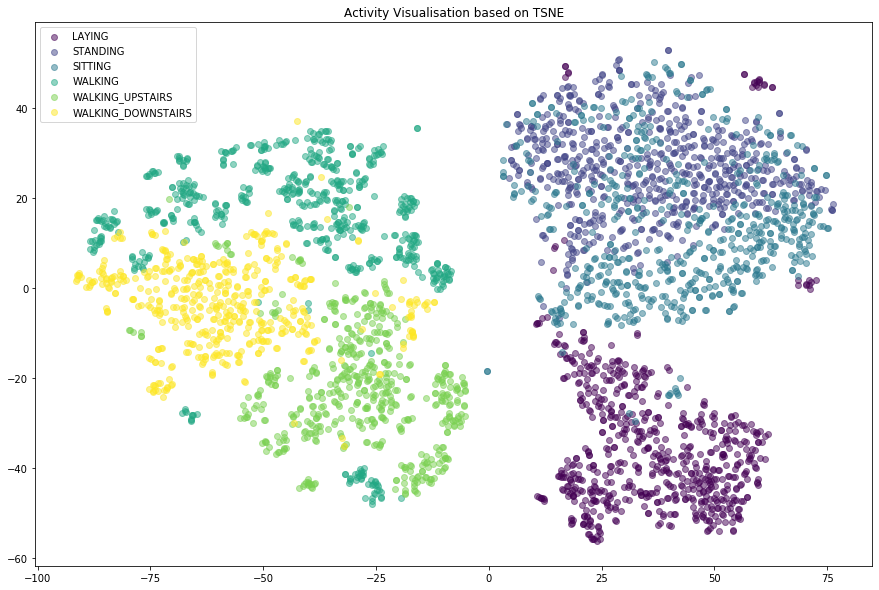

In [15]:
#Plot Activity Seperation in classes
fig, ax = plt.subplots(1, 1, figsize=(15,10))

### Plot Activities
# Get colors
n = label.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, group in enumerate(label_counts.index):
    # Mask to separate sets
    mask = (label==group).values
#     print(mask)
    ax.scatter(x=tsne_trans[mask][:,0], y=tsne_trans[mask][:,1], c=colors[i], alpha=0.5, label=group)
ax.set_title('Activity Visualisation based on TSNE')
ax.legend()
plt.show()

From the above Graph we can see that the activities are mostly seperable except for SITTING and STANDING

##### Trying to check how good the seperation is based on the simple Decission tree Model without any pre-processing

In [16]:
# Split training testing data
raw_data = orgDS.copy()
label = raw_data.pop('activity')

X_train, X_test, y_train, y_test = train_test_split(raw_data, label, random_state=3)


In [17]:
# Train DecisionTreeClassifier model
dtc = DecisionTreeClassifier(random_state=3)
%time dtc_model = dtc.fit(X_train, y_train)
classes  = dtc_model.classes_

Wall time: 2.38 s


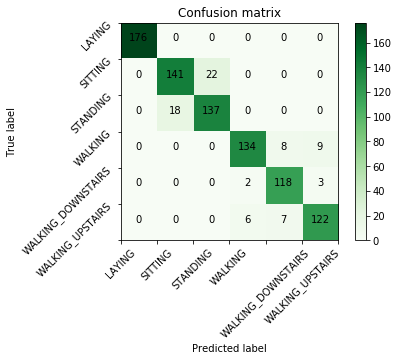

Classifier Name : DecisionTreeClassifier
Accuracy: 0.91694, Precision: 0.91496, Recall: 0.91656


In [18]:
evaluate_model(dtc_model, X_test, y_test, classes)

As can be seen the simple DecissionTreeClassifier is able to give substentially accurate Predictions.

Few other observations:
1. The model has trouble differenciating between "SITTING" and "STANDING"
2. The model has little confussion differenciating between "WALKING", "WALKING UPSTAIRS" and "WALKING DOWNSTAIRS"
3. Predictions for "LAYING" are more accurate.

We can try in following sections to identify better algorithms for Classification to improve Accuracy, Precission and Recall. 

### 7. Data Preparation and Feature Selection

In this section will perform following Data Prep and Feature selection options.

1. Scalling
2. Evaluate Multiple Feature selection/Reduction options
    1. PCA
    2. Tree Based Feature Selection
    3. LinearSVC Based Feature selection

In [19]:
# Create label
scaled_data = orgDS.copy()
label = scaled_data.pop('activity')

# Scale data
scl = StandardScaler()
scaled_data = scl.fit_transform(scaled_data)

# X_train, X_test, y_train, y_test = train_test_split(scaled_data, label, random_state=3)

In [20]:
org = orgDS.copy()
label = org.pop('activity')

Reduced_datasets = [('ORG',org)]

In [21]:
# PCA Based Feature Reduction

pca = PCA(n_components=0.9, random_state=3)
pca_reduced_data = pca.fit_transform(scaled_data)
print(pca_reduced_data.shape)
Reduced_datasets.append(('PCA Reduced', pca_reduced_data))

(3609, 64)


In [22]:
# Decission Tree Based Feature Reduction
dt = DecisionTreeClassifier(random_state=3)
dt_reduced_data = select_features(dt, scaled_data, label)
Reduced_datasets.append(('DT Reduced', dt_reduced_data))

(3609, 44)


In [23]:
# Random Forest Based Feature Reduction
rf = RandomForestClassifier(n_estimators=100,random_state=3)
rf_reduced_data = select_features(rf, scaled_data, label)
Reduced_datasets.append(('RF Reduced', rf_reduced_data))

(3609, 126)


In [24]:
# Extra Tree Based Feature Reduction
et = ExtraTreeClassifier(random_state=3)
et_reduced_data = select_features(et, scaled_data, label)
Reduced_datasets.append(('ET Reduced', et_reduced_data))

(3609, 69)


In [25]:
# Linear SVC Based Feature Reduction

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False,random_state=3, max_iter=5000)
lsvc_reduced_data = select_features(lsvc, scaled_data, label)
Reduced_datasets.append(('LSVC Reduced', lsvc_reduced_data))

(3609, 155)


------------------------------------------------------------------------------------
ORG
Wall time: 2.56 s


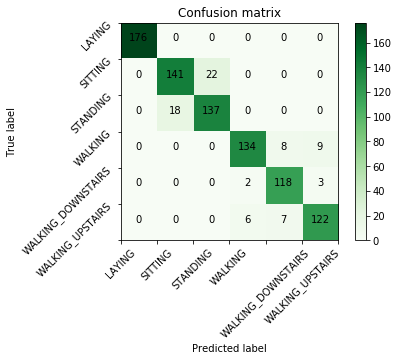

Classifier Name : DecisionTreeClassifier
Accuracy: 0.91694, Precision: 0.91496, Recall: 0.91656
------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
PCA Reduced
Wall time: 464 ms


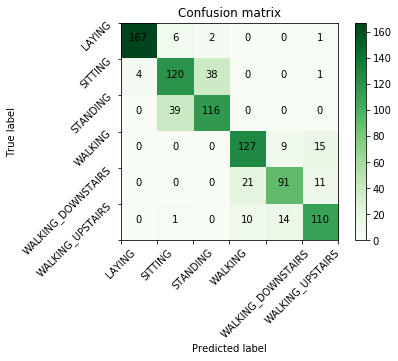

Classifier Name : DecisionTreeClassifier
Accuracy: 0.80952, Precision: 0.80704, Recall: 0.80486
------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
DT Reduced
Wall time: 233 ms


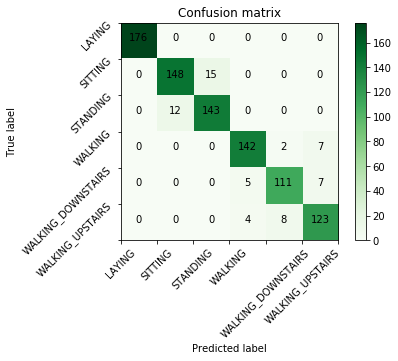

Classifier Name : DecisionTreeClassifier
Accuracy: 0.93355, Precision: 0.93094, Recall: 0.93075
------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
RF Reduced
Wall time: 493 ms


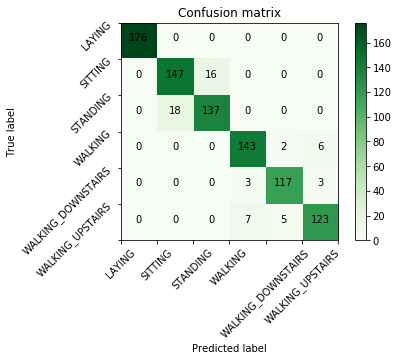

Classifier Name : DecisionTreeClassifier
Accuracy: 0.93355, Precision: 0.93272, Recall: 0.93251
------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
ET Reduced
Wall time: 249 ms


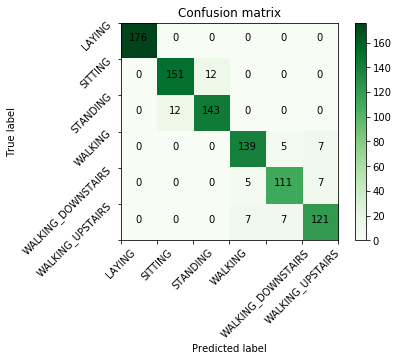

Classifier Name : DecisionTreeClassifier
Accuracy: 0.93134, Precision: 0.92804, Recall: 0.92804
------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
LSVC Reduced
Wall time: 618 ms


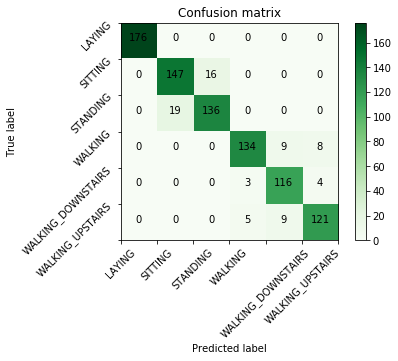

Classifier Name : DecisionTreeClassifier
Accuracy: 0.91916, Precision: 0.91656, Recall: 0.91768
------------------------------------------------------------------------------------


In [26]:
# Train DecisionTreeClassifier model with different DS and plot Confusion Matrics

for ds in Reduced_datasets:
    print('------------------------------------------------------------------------------------')
    print(ds[0])
    X_train, X_test, y_train, y_test = train_test_split(ds[1], label, random_state=3)
    dtc = DecisionTreeClassifier(random_state=3)
    %time dtc_model = dtc.fit(X_train, y_train)
    classes  = dtc_model.classes_
    evaluate_model(dtc_model, X_test, y_test, classes)
    print('------------------------------------------------------------------------------------')
    

1. DecissionTreeClassifier based Feature reduction 
        Accuracy: 0.93355, Precision: 0.93094, Recall: 0.93075
2. RandomForestClassifier based Feature reduction
        Accuracy: 0.93355, Precision: 0.93272, Recall: 0.93251
3. ExtraTreeClassifier based Feature reduction
        Accuracy: 0.93134, Precision: 0.92804, Recall: 0.92804
3. Original Dataset based 
        Accuracy: 0.91694, Precision: 0.91496, Recall: 0.91656

Based on the above we can see that the RandomForestClassifier gives best Accuracy, Precision and Recall. Which is even better than the original Dataset itself.

Thus we will use this RandomForestClassifier reduced dataset for further Model evaluations as that has slightly better precision and recall.

### 8. Model Creation and Evaluation

In This section we will train multiple models with different algorithms and find best suited algorithm for the dataset.

In [27]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.05, probability=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    OneVsRestClassifier(DecisionTreeClassifier(max_depth=5))]

In [28]:
selected_ds = rf_reduced_data.copy()
print(selected_ds.shape)

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(selected_ds, label, random_state=3)

(3609, 126)


Wall time: 61.5 ms


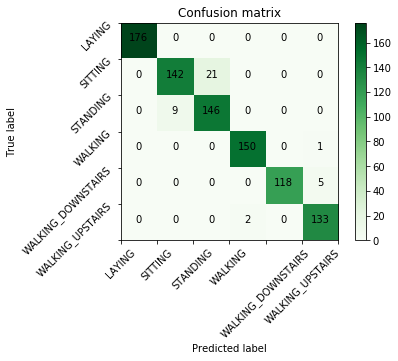

Classifier Name : KNeighborsClassifier
Accuracy: 0.95792, Precision: 0.95972, Recall: 0.95850
--------------------------------------------------
Wall time: 1.68 s


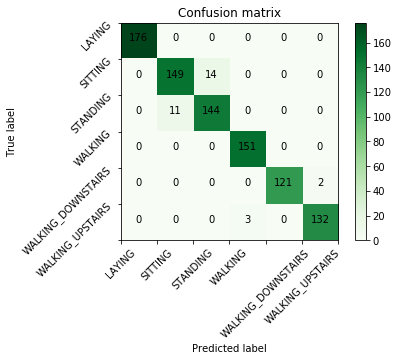

Classifier Name : SVC
Accuracy: 0.96678, Precision: 0.96804, Recall: 0.96744
--------------------------------------------------
Wall time: 268 ms


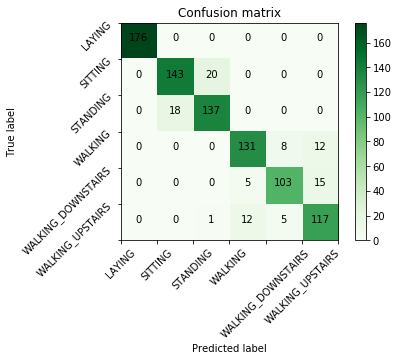

Classifier Name : DecisionTreeClassifier
Accuracy: 0.89369, Precision: 0.89014, Recall: 0.88880
--------------------------------------------------
Wall time: 55 ms


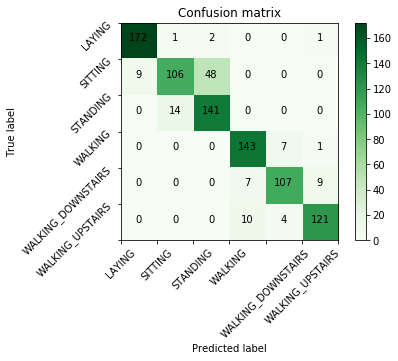

Classifier Name : RandomForestClassifier
Accuracy: 0.87486, Precision: 0.88029, Recall: 0.87508
--------------------------------------------------
Wall time: 3.88 s


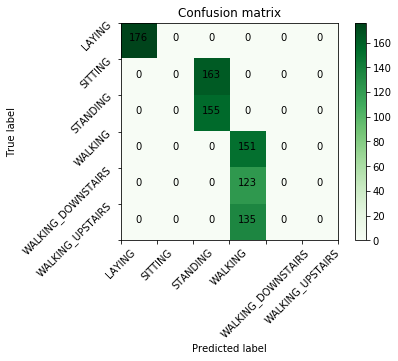

Classifier Name : AdaBoostClassifier
Accuracy: 0.53378, Precision: 0.30944, Recall: 0.50000
--------------------------------------------------
Wall time: 25 ms


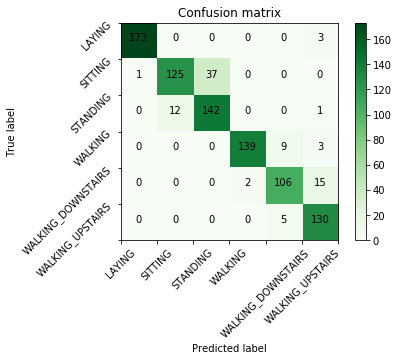

Classifier Name : GaussianNB
Accuracy: 0.90255, Precision: 0.90406, Recall: 0.90187
--------------------------------------------------
Wall time: 423 ms


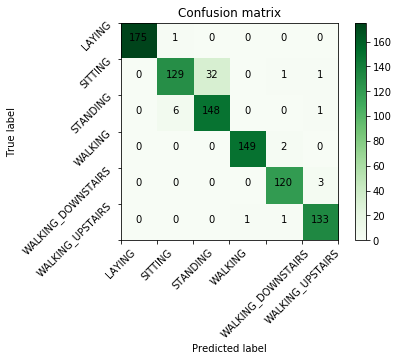

Classifier Name : QuadraticDiscriminantAnalysis
Accuracy: 0.94574, Precision: 0.94927, Recall: 0.94802
--------------------------------------------------
Wall time: 1.09 s


Classifier Name : OneVsRestClassifier
Accuracy: 0.90476, Precision: 0.90367, Recall: 0.90277
--------------------------------------------------


In [29]:
for classifier in classifiers:
    %time model = classifier.fit(X_train_final, y_train_final)
    classes  = model.classes_
    evaluate_model(model, X_test_final, y_test_final, classes)
    print('--------------------------------------------------')

Based on the above SVC with Linear Kernel seems to be providing the best results. 

Thus will try to tune the SVC with Linear kernel using GridSeaarchCV in the next section.

### 9. Refining Model using GridSearchCV

In [30]:
parameters = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [200, 100, 1, 0.5, 0.1, 0.025],
}

selector = GridSearchCV(SVC(probability=True), parameters, scoring='accuracy',cv=5)

selector.fit(X_train_final, y_train_final)

print('Best parameter set found:')
print(selector.best_params_)
print('Detailed grid scores:')
means = selector.cv_results_['mean_test_score']
stds = selector.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, selector.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))
    print()

Best parameter set found:
{'C': 100, 'kernel': 'rbf'}
Detailed grid scores:
0.956 (+/-0.016) for {'C': 200, 'kernel': 'linear'}

0.960 (+/-0.009) for {'C': 200, 'kernel': 'rbf'}

0.955 (+/-0.017) for {'C': 200, 'kernel': 'poly'}

0.956 (+/-0.016) for {'C': 100, 'kernel': 'linear'}

0.962 (+/-0.013) for {'C': 100, 'kernel': 'rbf'}

0.955 (+/-0.019) for {'C': 100, 'kernel': 'poly'}

0.956 (+/-0.023) for {'C': 1, 'kernel': 'linear'}

0.945 (+/-0.022) for {'C': 1, 'kernel': 'rbf'}

0.931 (+/-0.008) for {'C': 1, 'kernel': 'poly'}

0.954 (+/-0.021) for {'C': 0.5, 'kernel': 'linear'}

0.936 (+/-0.022) for {'C': 0.5, 'kernel': 'rbf'}

0.920 (+/-0.017) for {'C': 0.5, 'kernel': 'poly'}

0.950 (+/-0.022) for {'C': 0.1, 'kernel': 'linear'}

0.905 (+/-0.013) for {'C': 0.1, 'kernel': 'rbf'}

0.889 (+/-0.036) for {'C': 0.1, 'kernel': 'poly'}

0.945 (+/-0.024) for {'C': 0.025, 'kernel': 'linear'}

0.851 (+/-0.024) for {'C': 0.025, 'kernel': 'rbf'}

0.761 (+/-0.023) for {'C': 0.025, 'kernel': 'poly'}



In [31]:
# Based on above model selecting the best estomator from the GridSearchCV.

final_model = selector.best_estimator_

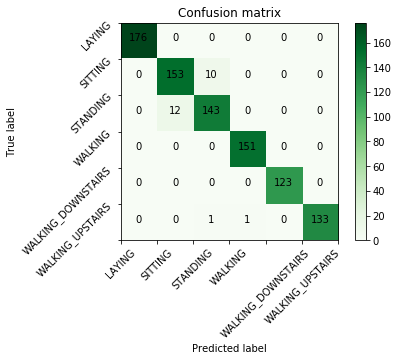

Classifier Name : SVC
Accuracy: 0.97342, Precision: 0.97488, Recall: 0.97440


In [32]:
# Using the Best estimator, predicting for Test Set.

classes = final_model.classes_
evaluate_model(final_model, X_test_final, y_test_final, classes)


### 10. Conclusion and Observations

1. As can be seen from the above analysis, we can predict the Human Activity based on the provided Sensor data with very high precision (~97.5%) and accuracy(~97.3%).

2. Feature reduction in this case helps not only to improve the training time for the model but also improves accuracy and precision.

3. Final model is providing better predictions for Test Dataset compared to Train dataset which indicates that the model is not overfitted and is still able to generalize.